In [1]:
import pymc3 as pm
import seaborn as sn
import numpy as np
import scipy
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

from scipy import stats
from astropy.stats import bootstrap
import seaborn as sns

Sergio Arnaud Gómez

Jorge Rotter Vallejo

## Pregunta 1

1.$ Y|\theta \sim G(1,\theta)$ y $\theta \sim IG(\alpha, \beta)$

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [y, theta]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 2360.15draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114781978>,
      dtype=object)

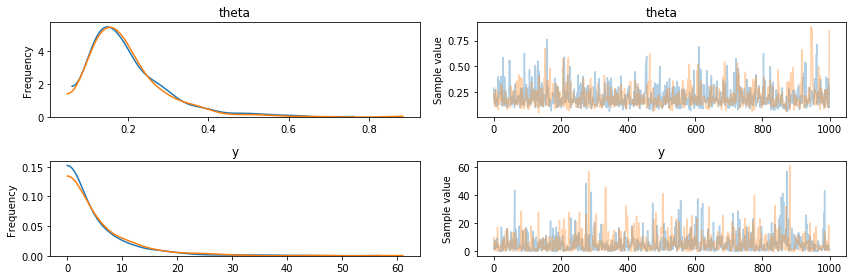

In [2]:
alpha = 6
beta  = 1
with pm.Model() as model:
    theta = pm.InverseGamma('theta',alpha=alpha, beta=beta)
    Y = pm.Gamma('y',1,theta)
    trace = pm.sample(1000)
pm.traceplot(trace)

- Encuentren la distribución posterior de $\theta.$

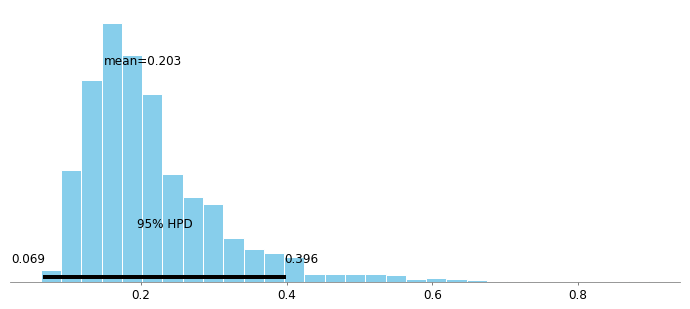

In [3]:
pm.plot_posterior(trace['theta'], figsize=(12,5))

Encuentren la media y varianza posterior de θ.

In [4]:
'Media: ', np.mean(trace['theta'])

('Media: ', 0.20262180737073265)

In [5]:
'Varianza: ',  np.var(trace['theta'])

('Varianza: ', 0.010188809374082538)

Encuentren la moda posterior de θ.

In [6]:
map_estimate = pm.find_MAP(model=model)
map_estimate['theta']

logp = -0.036938, ||grad|| = 0.00033341: 100%|██████████| 24/24 [00:00<00:00, 2110.25it/s]  


array(0.16666644)

Escriban dos ecuaciones integrales que se pueden resolver para encontrar el intervalo de 95 % de colas simétricas para θ.

## Pregunta 2

Los siguientes datos corresponden a las horas adicionales de sueño de 10 pacientes tratados con un somnífero B, comparado con un somnífero A:

In [7]:
x = np.array([1.2, 2.4, 1.3, 1.3, 0, 1, 1.8, 0.8, 4.6, 1.4])

Presentamos tres análisis bayesiano de estos datos, suponiendo diferentes verosimilitudes. En todos los casos usamos  distribuciones iniciales normales $\mathcal{N}(0, 1)$ para $\mu$ y $\mathrm{HalfCauchy}(1)$ para $\sigma^2$.

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


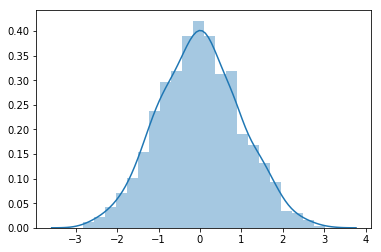

In [8]:
mu_sp = stats.norm.rvs(size=1000)
sns.distplot(mu_sp)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


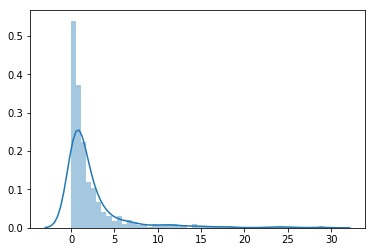

In [9]:
ssq_sp = stats.halfcauchy.rvs(size=1000)
sns.distplot(ssq_sp[30 > ssq_sp])

### a. $X|\theta \sim \mathcal{N}$

In [10]:
with pm.Model() as modelo_p2a:
    # Iniciales
    mu = pm.Normal('mu', 0,1)
    sigma_sq = pm.HalfCauchy('sigma_sq', 1)
    
    # Verosimilitud
    treatment_normal = pm.Normal('normal', mu, sigma_sq, observed=x)
    
    # Muestreo
    trace = pm.sample(start=pm.find_MAP())
    

logp = -19.042, ||grad|| = 6.3594e-07: 100%|██████████| 12/12 [00:00<00:00, 1701.89it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_sq, mu]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:00<00:00, 2042.51draws/s]


/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115bee7f0>,
      dtype=object)

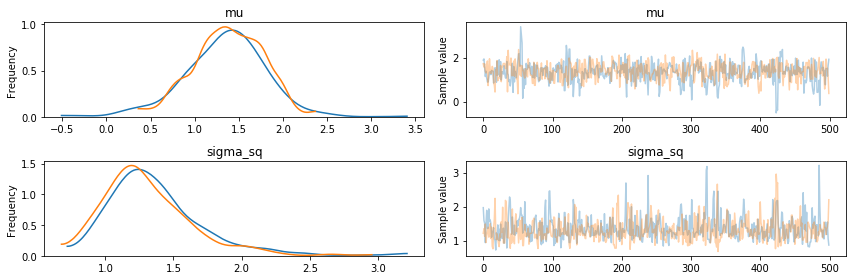

In [11]:
pm.traceplot(trace)

### b. $X|\theta \sim t_{(3)}$.

In [12]:
with pm.Model() as modelo_p2b:
    # Iniciales
    mu = pm.Normal('mu', 0,1)
    
    # Verosimilitud
    treatment_t3 = pm.StudentT('t3', nu=3, mu=mu, observed=x)
    
    # Muestreo
    trace = pm.sample(start=pm.find_MAP())
    

logp = -23.247, ||grad|| = 9.318: 100%|██████████| 6/6 [00:00<00:00, 1387.92it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:00<00:00, 2810.46draws/s]


/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115260860>,
      dtype=object)

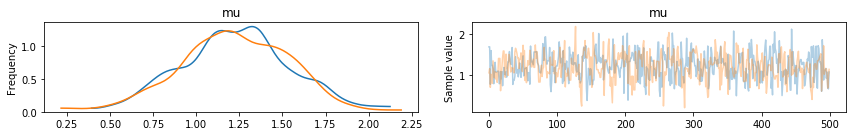

In [13]:
pm.traceplot(trace)

Aquí la distribución inicial de sigma fue demasiado laxa.

### c. $X|\theta \sim t_{(1)}$

In [14]:
with pm.Model() as modelo_p2c:
    # Iniciales
    mu = pm.Normal('mu', 0,1)
    
    # Verosimilitud
    treatment_t1 = pm.StudentT('t1', nu=1, mu=mu, observed=x)
    
    # Muestreo
    trace = pm.sample(start=pm.find_MAP())
    

logp = -23.964, ||grad|| = 7.8125: 100%|██████████| 7/7 [00:00<00:00, 1856.24it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:00<00:00, 3546.92draws/s]


/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114840240>,
      dtype=object)

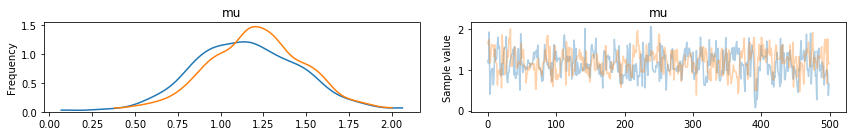

In [15]:
pm.traceplot(trace)

### d. $Y = \left[X<\bar{X}\right] \ , \ Y|\theta \sim \textrm{Bernoulli}(\theta)$

In [16]:
with pm.Model() as modelo_p2a:
    # Iniciales
    theta = pm.Uniform('theta', lower=0, upper=1)
    
    # Verosimilitud
    treatment_blli = pm.Bernoulli('blli', p=theta, observed=np.array([x>np.mean(x)])*1)
    
    # Muestreo
    trace = pm.sample(start=pm.find_MAP(), tune=1000)
    

logp = -6.9315, ||grad|| = 2: 100%|██████████| 6/6 [00:00<00:00, 1496.72it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:00<00:00, 3392.57draws/s]


/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1167f5048>,
      dtype=object)

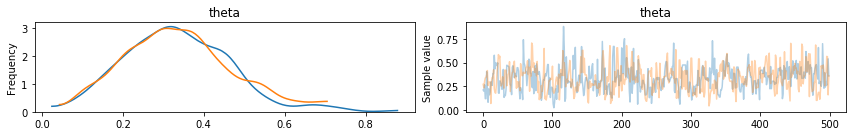

In [17]:
pm.traceplot(trace)

## Pregunta 3

Especificación de los datos

In [18]:
arr = np.array([1.6907,6,59,1.7242,13,60,1.7552, 18,62, 
                1.7842,28,56,1.8113,52,63, 1.8369,53,59, 
                1.8610,61,62,1.8839,60,60])
arr = np.reshape(arr, (8,3))
w = arr[:,0]
y = arr[:,1]
n = arr[:,2]

Con función logit

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:00<00:00, 2516.52draws/s]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1165c0160>,
      dtype=object)

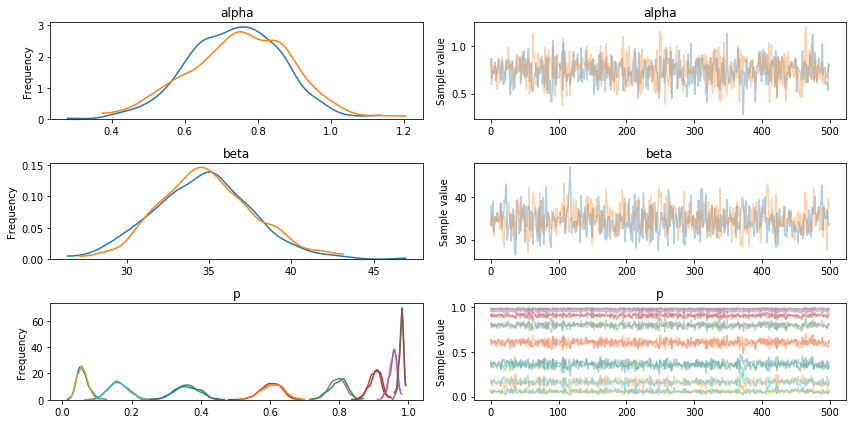

In [19]:
with pm.Model() as model:
    alpha = pm.Normal('alpha',0,sd=1/.001)
    beta = pm.Normal('beta',0,sd=1/.001)
    p = pm.Deterministic('p',pm.invlogit(alpha + beta*(w - np.mean(w))))
    deaths = pm.Binomial('deaths', n=n, p=p, observed=y)
    trace = pm.sample()
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114f71c88>,
      dtype=object)

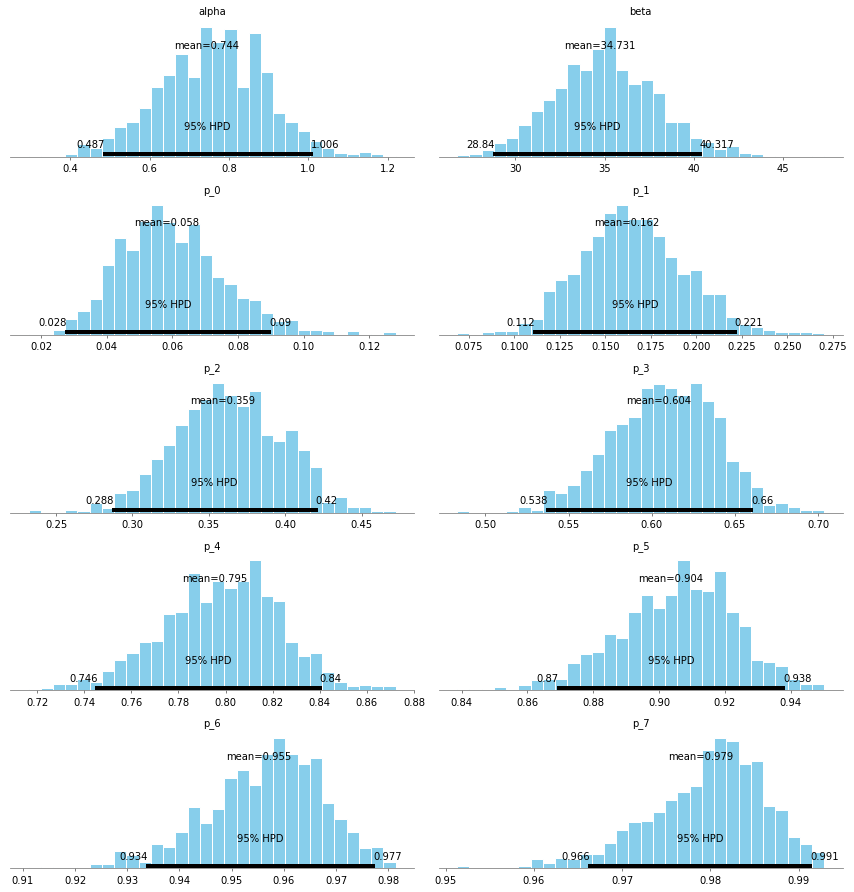

In [20]:
pm.plot_posterior(trace)

Con función probit

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
ERROR (theano.gof.opt): Optimization failure due to: local_grad_log_erfc_neg
ERROR (theano.gof.opt): node: Elemwise{true_div,no_inplace}(Elemwise{mul,no_inplace}.0, Elemwise{erfc,no_inplace}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python3.7/site-packages/theano/tensor/opt.py", line 6789, in local_grad_log_erfc_neg
    if not exp.owner.inputs[0].owner:
AttributeError: 'NoneType' object has no attribute 'owner'

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:00<00:00, 2417.64draws/s]
The acceptance probability does not match the target. It is 0.8795349838056046, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117da5940>,
      dtype=object)

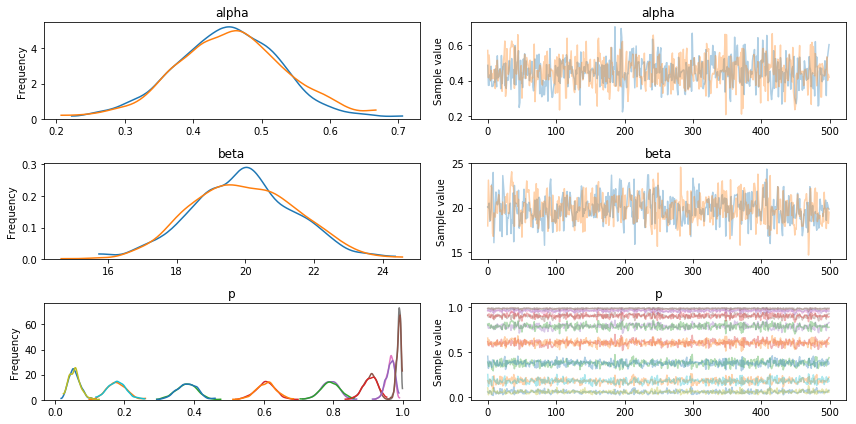

In [21]:
with pm.Model() as model:
    alpha = pm.Normal('alpha',0,sd=1/.001)
    beta = pm.Normal('beta',0,sd=1/.001)
    p = pm.Deterministic('p',pm.invprobit(alpha + beta*(w - np.mean(w))))
    deaths = pm.Binomial('deaths', n=n, p=p, observed=y)
    trace = pm.sample()
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117f932b0>,
      dtype=object)

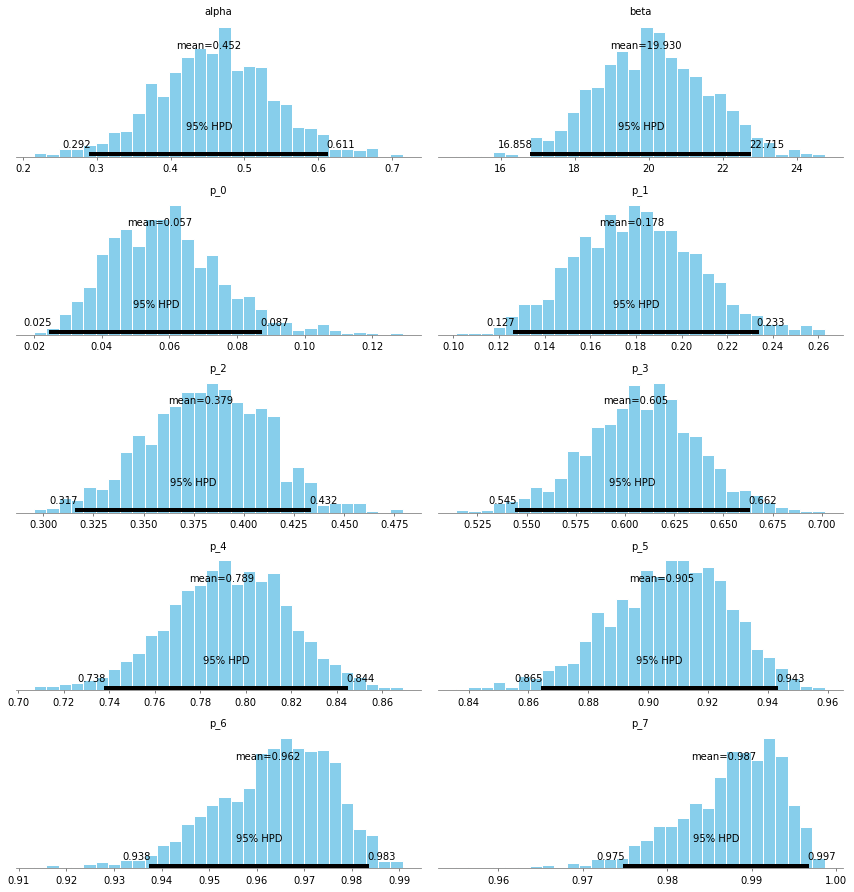

In [22]:
pm.plot_posterior(trace)

Con función complementaria log-log

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:00<00:00, 2601.62draws/s]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1183e6240>,
      dtype=object)

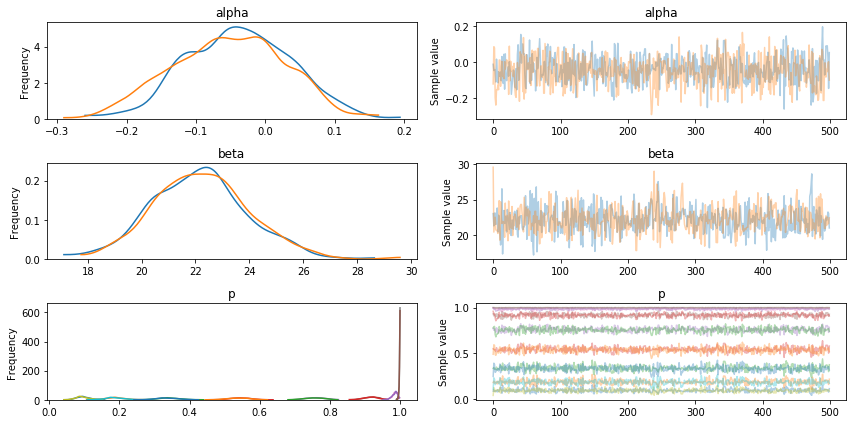

In [23]:
def cloglog(x):
    return 1 - np.exp(-np.exp(x))

with pm.Model() as model:
    alpha = pm.Normal('alpha',0,sd=1/.001)
    beta = pm.Normal('beta',0,sd=1/.001)
    p = pm.Deterministic('p',cloglog(alpha + beta*(w - np.mean(w))))
    deaths = pm.Binomial('deaths', n=n, p=p, observed=y)
    trace = pm.sample()
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11884aef0>,
      dtype=object)

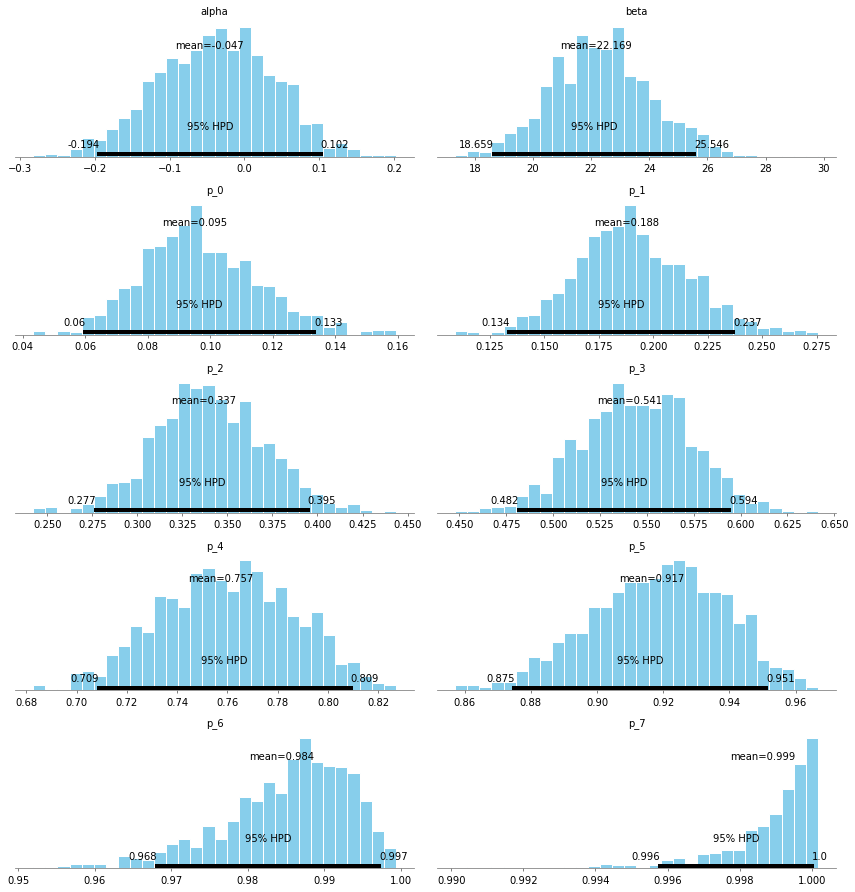

In [24]:
pm.plot_posterior(trace)

## Pregunta 4

Considere las siguientes dos distribuciones condicionales completas, analizadas en el artículo de Casella y George (1992):

$$
f(x|y) \propto ye^{-yx}, \ \ \ \ 0<x<B \\
f(y|x) \propto xe^{-xy}, \ \ \ \ 0<y<B
$$

Obtenga un estimado de la distribución marginal de $X$ cuando $B=10$ usando Gibbs sampler.

## Pregunta 5

En una prueba real, 12 lotes de mantequilla de cacahuate tienen residuos de aflato- xin en partes por mil millones de:

In [25]:
arr = np.array([4.94, 5.06, 4.53, 5.07, 4.99, 5.16, 4.38, 4.43, 4.93, 4.72, 4.92, 4.96])

- ¿Cuántas posibles muestras boototrap hay en estos datos

In [26]:
n = len(arr)
scipy.special.comb(2*n-1,n-1,exact=True)

1352078

Usando R y la función sample, o una tabla de números aleatorios, generar 100 remuestras de los datos de la muestra. Para cada una de estas remuestras, obtener la media. Comparar la media de las medias obtenidas en las remuestras con la media de la muestra original.

In [27]:
sample = np.random.choice(arr, size=100, replace=True)
np.mean(sample)

4.838

In [28]:
np.mean(arr)

4.840833333333333

Y comparando

In [29]:
err = 100*(np.mean(sample) - np.mean(arr))/ np.mean(arr)
print('Erorr = {}%'.format(round(err,4)))

Erorr = -0.0585%


Encontrar de las 100 remuestras, un intervalo de confianza del 95 % para la media.

In [30]:
ans = bs.bootstrap(arr,bs_stats.mean,num_iterations=100, alpha=.05)
print('Intervalo de confianza al nivel 95%: [{},{}]'.format(round(ans.lower_bound,2), round(ans.upper_bound,2)))

Intervalo de confianza al nivel 95%: [4.73,4.98]


## Pregunta 6

El número de accidentes aéreoes de 1983 a 2006 está dado en el vector

In [31]:
x = np.array([23, 16, 21, 24, 34, 30, 28, 24, 26, 18, 23, 36, 37, 49, 50, 51, 56, 46, 41, 54, 30, 40, 40, 31])

Calcule la media (con su error estándar) y la mediana.

In [32]:
np.mean(x)

34.5

In [33]:
np.std(x)/np.sqrt(len(x))

2.3782871988050562

In [34]:
np.median(x)

32.5

Calcule estimaciones bootstrap de la media y la mediana, ambas con sus errores estándar, usando $B=1000$ remuestras. Calcule la mediana de las medianas muestrales.

34.56608333333334


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


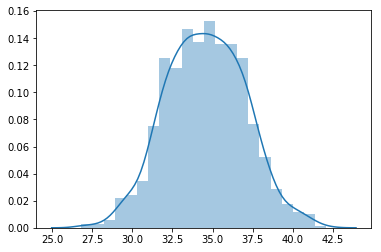

In [35]:
B = 1000

# Medias boostrap
medias = bootstrap(x, B, bootfunc=np.mean)
print(np.mean(medias))
sns.distplot(medias)

In [36]:
# Error estándar del estimador bootstrap de la media
def bootstrap_se(x):
    return np.std(x)/np.sqrt(len(x))

bootstrap_se(medias)

0.0779010301154969

32.5


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


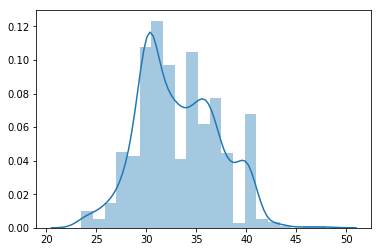

In [37]:
# Medianas boostrap
medianas = bootstrap(x, B, bootfunc=np.median)
print(np.median(medianas))
sns.distplot(medianas)

In [38]:
# Error estándar del estimador mediana bootstrap
bootstrap_se(medianas)

0.1243853849935755

La mediana de las medianas coincide con la estimación plana de la mediana, mientras que la media baja (pero muy poco). En erro estándar, el de la media es menor que el de la mediana.

## Pregunta 7

La $\tau$ de Kendall entre $X$ y $Y$ es $0.55$ y tanto $X$ como $Y$ son positivas. 

¿Cuál es la $\tau$ entre $X$ y $\frac{1}{Y}$?
¿Cuál es la $\tau$ de $\frac{1}{X}$ y $\frac{1}{Y}$?

Recordemos que la $\tau$ de Kendall está dada por la siguiente expresión:

$$ \rho_{\tau}(X,Y) = P((X −X^*)(Y −Y^*) > 0)−P((X −X^*)(Y −Y^*) < 0) $$

De hecho es fácil notar que si $U=F(X)$ y $V=G(Y)$: 

$$ \begin{eqnarray}  \rho_{\tau}(X,Y) &=& P((X −X^*)(Y −Y^*) > 0)−P((X −X^*)(Y −Y^*) < 0) \\ &=& 4P(X<X^*,Y<Y^*) - 1 \\ &=& 4P(F(X)<F(X^*),G(Y)<G(Y^*) - 1\\ &=& 4P(U<U^*,V<V^*) - 1 \\ \end{eqnarray} $$
    
De hecho:

$$ \rho_{\tau}(X,Y) = 4 \int_0^1 \int_0^1 C_{X,Y}(u,v) d_{C_{X,Y}(u,v)} -1 $$ 

Donde C_{X,Y} es la cópula entre X y Y. Concluimos que la tau de kendal es invariante ante transformaciones monótonas. Dado que ambas son positivas, $\frac{1}{Y}$ es monótona decreciente de forma que el valor de la $\tau$ entre $X$ y $\frac{1}{Y}$ es -.55. Siguiendo el mismo argumento, el valor de la $\tau$ de $\frac{1}{X}$ y $\frac{1}{Y}$ es .55